In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn import preprocessing

In [2]:
file = 'C:/Users/EN/DataScienceAcademy/Project5/creditcard.csv'
df=pd.read_csv(file)

Text(0.5, 1.0, 'Class Distributions \n (0: No Fraud || 1: Fraud)')

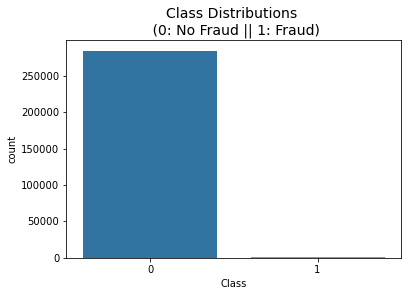

In [3]:
sns.countplot('Class', data=df)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)

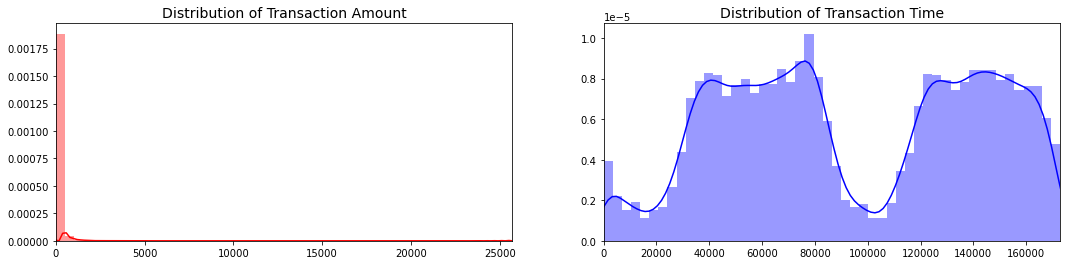

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = df['Amount'].values
time_val = df['Time'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])
plt.show()

In [3]:
# outlier detection
from sklearn.preprocessing import StandardScaler, RobustScaler

std_scaler = StandardScaler()
rob_scaler = RobustScaler()

df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time','Amount'], axis=1, inplace=True)

In [4]:
scaled_amount = df['scaled_amount']
scaled_time = df['scaled_time']

df.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
df.insert(0, 'scaled_amount', scaled_amount)
df.insert(1, 'scaled_time', scaled_time)

df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   scaled_amount  284807 non-null  float64
 1   scaled_time    284807 non-null  float64
 2   V1             284807 non-null  float64
 3   V2             284807 non-null  float64
 4   V3             284807 non-null  float64
 5   V4             284807 non-null  float64
 6   V5             284807 non-null  float64
 7   V6             284807 non-null  float64
 8   V7             284807 non-null  float64
 9   V8             284807 non-null  float64
 10  V9             284807 non-null  float64
 11  V10            284807 non-null  float64
 12  V11            284807 non-null  float64
 13  V12            284807 non-null  float64
 14  V13            284807 non-null  float64
 15  V14            284807 non-null  float64
 16  V15            284807 non-null  float64
 17  V16            284807 non-nul

In [7]:
label_encoder = preprocessing.LabelEncoder() #label encoding on class_label before logistic regression
df['Class']= label_encoder.fit_transform(df['Class']) 
df['Class'].unique()

array([0, 1], dtype=int64)

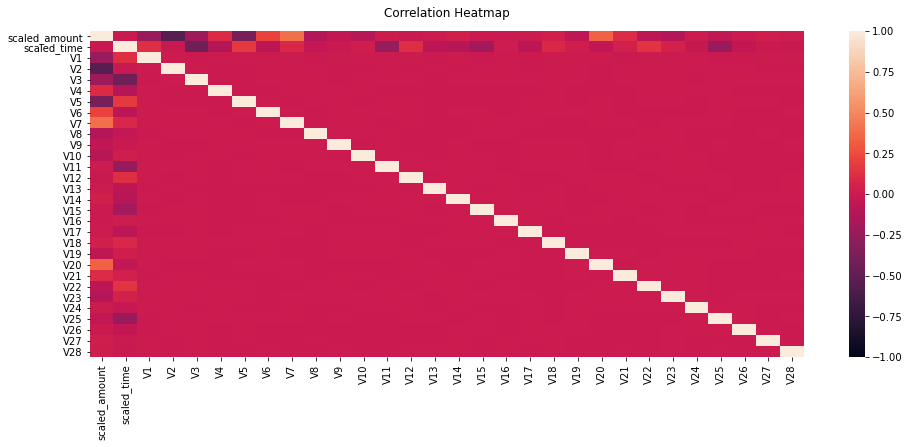

In [13]:
X = df.drop('Class', axis=1)
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(X.corr(), vmin=-1, vmax=1)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=14);

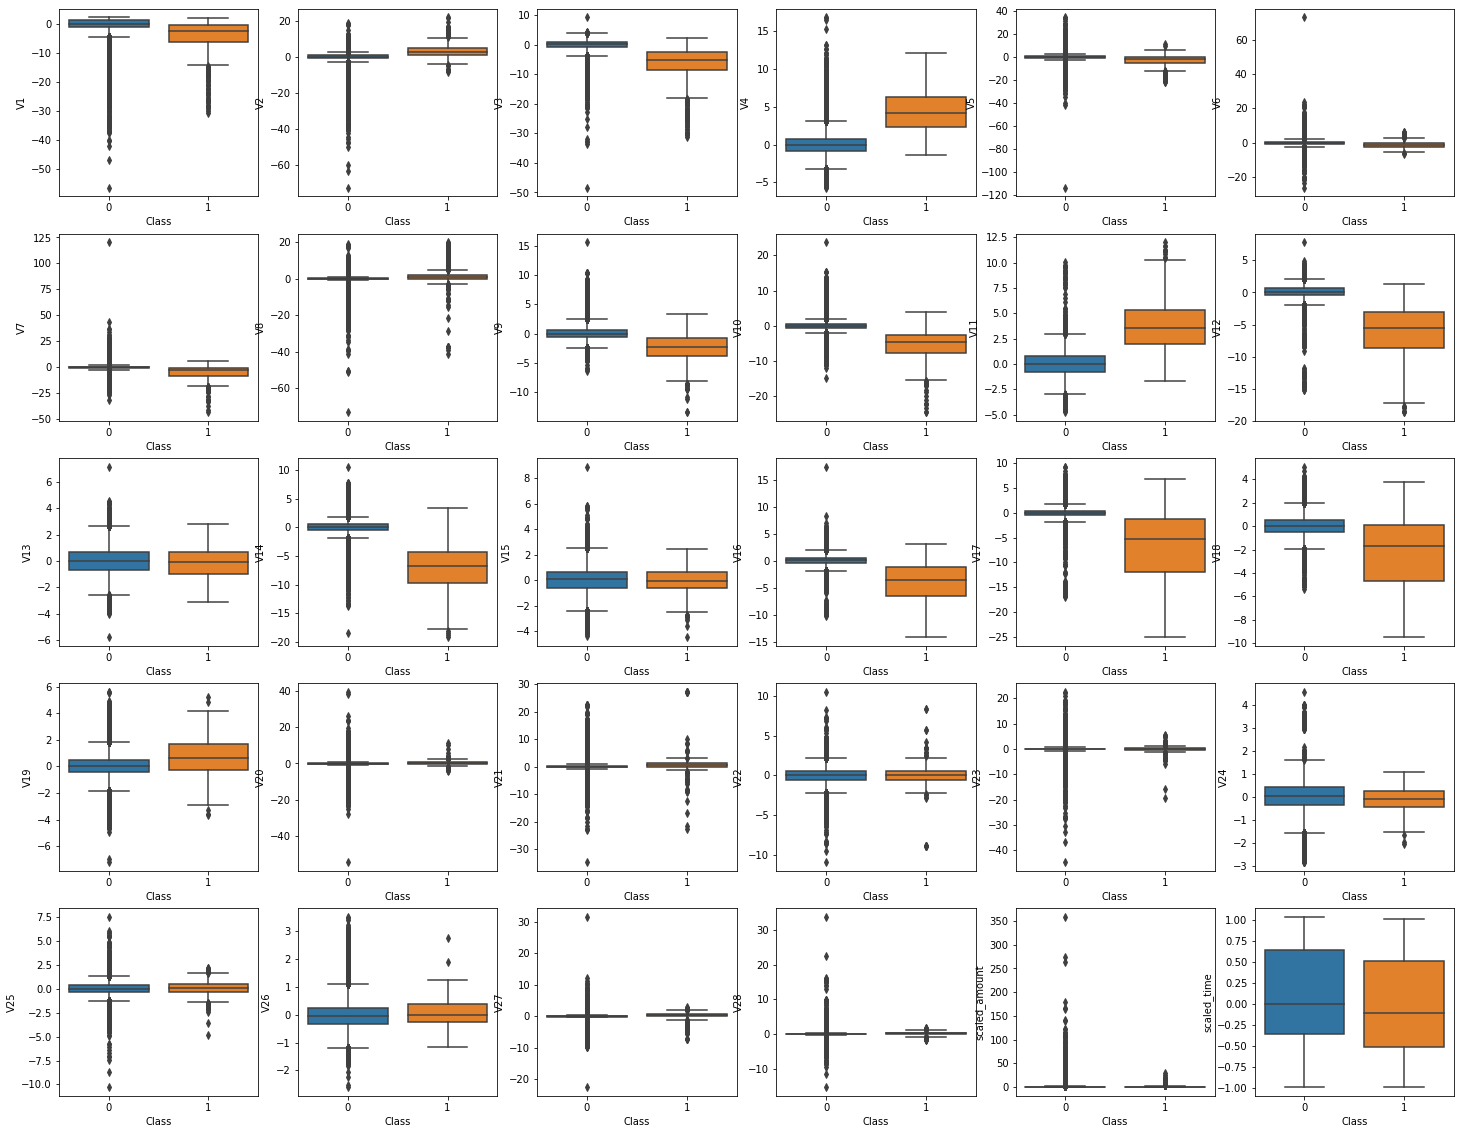

In [22]:
plt.figure(figsize=[25,20])

plt.subplot(5,6,1)
sns.boxplot(x="Class", y="V1", data=df)

plt.subplot(5,6,2)
sns.boxplot(x="Class", y="V2", data=df)

plt.subplot(5,6,3)
sns.boxplot(x="Class", y="V3", data=df)

plt.subplot(5,6,4)
sns.boxplot(x="Class", y="V4", data=df)

plt.subplot(5,6,5)
sns.boxplot(x="Class", y="V5", data=df)

plt.subplot(5,6,6)
sns.boxplot(x="Class", y="V6", data=df)

plt.subplot(5,6,7)
sns.boxplot(x="Class", y="V7", data=df)

plt.subplot(5,6,8)
sns.boxplot(x="Class", y="V8", data=df)

plt.subplot(5,6,9)
sns.boxplot(x="Class", y="V9", data=df)

plt.subplot(5,6,10)
sns.boxplot(x="Class", y="V10", data=df)

plt.subplot(5,6,11)
sns.boxplot(x="Class", y="V11", data=df)

plt.subplot(5,6,12)
sns.boxplot(x="Class", y="V12", data=df)

plt.subplot(5,6,13)
sns.boxplot(x="Class", y="V13", data=df)

plt.subplot(5,6,14)
sns.boxplot(x="Class", y="V14", data=df)

plt.subplot(5,6,15)
sns.boxplot(x="Class", y="V15", data=df)

plt.subplot(5,6,16)
sns.boxplot(x="Class", y="V16", data=df)

plt.subplot(5,6,17)
sns.boxplot(x="Class", y="V17", data=df)

plt.subplot(5,6,18)
sns.boxplot(x="Class", y="V18", data=df)

plt.subplot(5,6,19)
sns.boxplot(x="Class", y="V19", data=df)

plt.subplot(5,6,20)
sns.boxplot(x="Class", y="V20", data=df)

plt.subplot(5,6,21)
sns.boxplot(x="Class", y="V21", data=df)

plt.subplot(5,6,22)
sns.boxplot(x="Class", y="V22", data=df)

plt.subplot(5,6,23)
sns.boxplot(x="Class", y="V23", data=df)

plt.subplot(5,6,24)
sns.boxplot(x="Class", y="V24", data=df)

plt.subplot(5,6,25)
sns.boxplot(x="Class", y="V25", data=df)

plt.subplot(5,6,26)
sns.boxplot(x="Class", y="V26", data=df)

plt.subplot(5,6,27)
sns.boxplot(x="Class", y="V27", data=df)

plt.subplot(5,6,28)
sns.boxplot(x="Class", y="V28", data=df)

plt.subplot(5,6,29)
sns.boxplot(x="Class", y="scaled_amount", data=df)

plt.subplot(5,6,30)
sns.boxplot(x="Class", y="scaled_time", data=df)

plt.show()

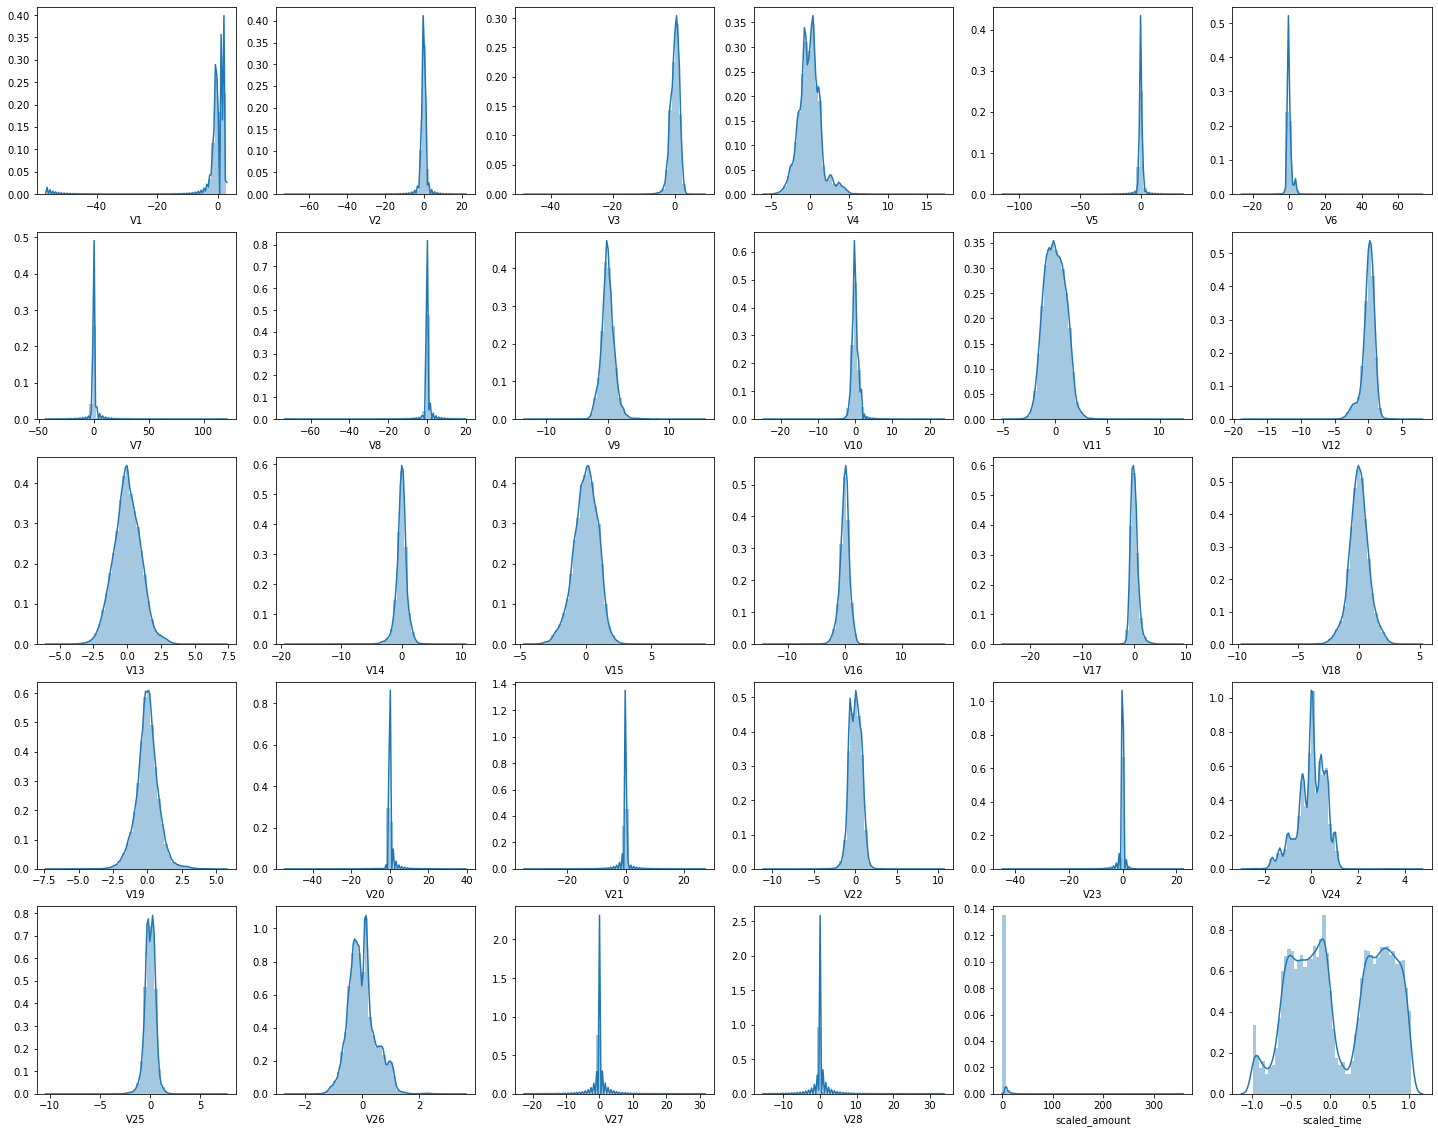

In [21]:
plt.figure(figsize=[25,20])

plt.subplot(5,6,1)
sns.distplot(df["V1"])

plt.subplot(5,6,2)
sns.distplot(df["V2"])

plt.subplot(5,6,3)
sns.distplot(df["V3"])

plt.subplot(5,6,4)
sns.distplot(df["V4"])

plt.subplot(5,6,5)
sns.distplot(df["V5"])

plt.subplot(5,6,6)
sns.distplot(df["V6"])

plt.subplot(5,6,7)
sns.distplot(df["V7"])

plt.subplot(5,6,8)
sns.distplot(df["V8"])

plt.subplot(5,6,9)
sns.distplot(df["V9"])

plt.subplot(5,6,10)
sns.distplot(df["V10"])

plt.subplot(5,6,11)
sns.distplot(df["V11"])

plt.subplot(5,6,12)
sns.distplot(df["V12"])

plt.subplot(5,6,13)
sns.distplot(df["V13"])

plt.subplot(5,6,14)
sns.distplot(df["V14"])

plt.subplot(5,6,15)
sns.distplot(df["V15"])

plt.subplot(5,6,16)
sns.distplot(df["V16"])

plt.subplot(5,6,17)
sns.distplot(df["V17"])

plt.subplot(5,6,18)
sns.distplot(df["V18"])

plt.subplot(5,6,19)
sns.distplot(df["V19"])

plt.subplot(5,6,20)
sns.distplot(df["V20"])

plt.subplot(5,6,21)
sns.distplot(df["V21"])

plt.subplot(5,6,22)
sns.distplot(df["V22"])

plt.subplot(5,6,23)
sns.distplot(df["V23"])

plt.subplot(5,6,24)
sns.distplot(df["V24"])

plt.subplot(5,6,25)
sns.distplot(df["V25"])

plt.subplot(5,6,26)
sns.distplot(df["V26"])

plt.subplot(5,6,27)
sns.distplot(df["V27"])

plt.subplot(5,6,28)
sns.distplot(df["V28"])

plt.subplot(5,6,29)
sns.distplot(df["scaled_amount"])

plt.subplot(5,6,30)
sns.distplot(df["scaled_time"])

plt.show()